# Gauss Method of solving Linear Equations and Loss 

## Task 1. Implementing Gaussian Elimination Method for solving Linear Equations

Firslty, we import needed packages:

In [1]:
# Used for finding an accurate solution
from fractions import Fraction

# This one will be used for some beautiful illustrations :)
import matplotlib.pyplot as plt

During evaluation, we use the squared $\ell_2$ norm, that is
$$
\|\boldsymbol{x}\| := \sum_{i=1}^n x_i^2
$$

We also define class $\texttt{Gauss}$ which implements three primary functions:
- $\texttt{solve}(\mathbf{M}, \boldsymbol{b})$ - solves equation $\mathbf{M}\boldsymbol{x} = \boldsymbol{b}$ for $\mathbf{M} \in \mathbb{R}^{n\times n}, \boldsymbol{b} \in \mathbb{R}^n$ 
- $\texttt{loss_matrix}(\mathbf{M}, \boldsymbol{b}, \boldsymbol{x})$ - finds loss according to formula $\mathcal{L}_M(\boldsymbol{x} \mid \mathbf{M}, \boldsymbol{b}):=\|\mathbf{M}\boldsymbol{x} - \boldsymbol{b}\|$
- $\texttt{loss_vector}(\hat{\boldsymbol{x}}, \boldsymbol{x})$ - finds loss according to formula $\mathcal{L}_v(\boldsymbol{x} \mid \hat{\boldsymbol{x}}):=\|\boldsymbol{x} - \hat{\boldsymbol{x}}\|$ where $\hat{\boldsymbol{x}}$ is a true equation's solution 

In [2]:
class Gauss:
    def l2_squared(X):
        """
        Returns l2_squared norm defines as x1**2+x2**2+...+xn**2
        
        Input:
        X - vector
        
        Output:
        result - value of ||X||
        """
        result = 0.0
        for x in X:
            result += x**2
        return result
    
    def l1(X):
        """
        Returns l1 norm defined as |x1|+|x2|+...+|xn|
        
        Input:
        X - vector
        
        Output:
        result - value of ||X||
        """
        result = 0.0
        for x in X:
            result += abs(x)
        return result
    
    # Defining a list of supported metrics
    supported_metrics = {
        'l1' : l1,
        'l2_squared' : l2_squared
    }
    
    def __init__(self, metric='l2_squared'):
        # Settings a value from dictionary
        self.metric = self.supported_metrics[metric]
    
    def solve(self, M, b):
        """
        Input:
        M - matrix of size nxn
        b - vector on the right side of equation Mx=b with a size of n
        
        Output:
        x - vector of length n - solution to a linear equation given M and b
        
        Note:
        Function does not implement a main element method
        """
        
        assert len(M) == len(b), "Matrix and vector must have the same size"
        
        n = len(b)
        x = [0] * n
        
        # Forward propagation
        for i in range(n):
            # Divide ith row by M[i][i]
            for j in range(i+1,n): 
                M[i][j] = M[i][j] / M[i][i] 
            # Divide b[i] by M[i][i]
            b[i] = b[i] / M[i][i]
            # Settings M[i][i] to 1
            M[i][i] = 1
            # Subtracting from jth raw ith raw multiplied by M[i][i]
            for j in range(i+1,n):
                # Iterating from (i+1)th to nth columns
                for k in range(i+1,n):
                    # From kth element in row j subtract kth element in row i multiplied by M[j][i]
                    M[j][k] = M[j][k] - M[i][k] * M[j][i]
                # From b[j] subtract b[i] multiplied by M[j][i]
                b[j] = b[j] - b[i] * M[j][i]
                M[j][i] = 0
                
        # Backpropagation
        for i in range(n-1,-1,-1):
            x[i] = b[i]
            for j in range(n-1-i):
                x[i] = x[i] - x[i+j+1]*M[i][i+j+1]
                
        # Returning x
        return x
    
    def loss_matrix(self, M, b, x):
        """
        Input:
        M, b - parameters of a linear equation Mx = b
        x - solution to be tested
        
        Return:
        Value of ||Mx-b||
        """
        
        assert len(M) == len(b), "Matrix and vector must have the same size"
        
        # Define vector d = Mx-b
        n = len(b)
        d = [0.0] * n
        
        for i in range(n):
            # Finding d[i] as a sum of M[i][j]*x[j] for j=1,...,n
            for j in range(n):
                d[i] = d[i] + M[i][j] * x[j]
            # Subtracting b[i] component
            d[i] = d[i] - b[i]
        
        # Returning a norm of this vector
        return self.metric(d)
    
    def loss_vector(self, x_real, x):
        """
        Input:
        x_real - a real solution of equation
        x - solution to be tested
        
        Return:
        Value of ||x-x_real||
        """
        
        # Defining a vector d = x - x_real
        n = len(x)
        d = [0] * n
        for i in range(n):
            d[i] = x[i] - x_real[i]
        
        return self.metric(d)

Let us test our class for the following values of $\mathbf{M}$ and $\boldsymbol{b}$:

$$
\mathbf{M} = 
\begin{bmatrix}
4.6 & -1.7 & 0.7 \\
8.0 & -2.1 & 0.9 \\
5.2 & -4.2 & 2.0 
\end{bmatrix}, \; \boldsymbol{b} = 
\begin{bmatrix}
2.0 \\ 7.0 \\ 3.0
\end{bmatrix}
$$

The solution, according to _Wolfram Mathematica_ is
$$
\boldsymbol{x} = \begin{bmatrix}
1.53203 \\ 14.3872 \\ 27.7298
\end{bmatrix}
$$

Loss value $\mathcal{L}_M=\|\mathbf{M}\boldsymbol{x} - \boldsymbol{b}\|$ must be low for this particular example

In [3]:
# Define gauss object
gauss = Gauss(metric='l2_squared')

# Defining parameters of a linear equation (Mx = b)
M = [
    [4.6, -1.7, 0.7],
    [8.0, -2.1, 0.9],
    [5.2, -4.2, 2.0]
]
b = [2.0, 7.0, 3.0]

# Finding answer and value of loss
x = gauss.solve(M, b)
loss = gauss.loss_matrix(M, b, x)

print('Result is', x)
print('Loss is', loss)

Result is [1.532033426183844, 14.387186629526466, 27.72980501392759]
Loss is 1.232595164407831e-32


## Task 2. Finding approximate solution with M being Hilbert matrix

Hilbert matrix $\mathbf{H}_n$ is defined as:

$$
\mathbf{H}_n = \left\{ \frac{1}{i+j-1} \right\}_{i,j=1}^n = \begin{bmatrix}
1 & \frac{1}{2} & \frac{1}{3} & \dots & \frac{1}{n} \\
\frac{1}{2} & \frac{1}{3} & \frac{1}{4} & \dots & \frac{1}{n+1} \\
\frac{1}{3} & \frac{1}{4} & \frac{1}{5} & \dots & \frac{1}{n+2} \\ 
\vdots & \vdots & \vdots & \ddots & \vdots \\
\frac{1}{n} & \frac{1}{n+1} & \frac{1}{n+2} & \dots & \frac{1}{2n-1}
\end{bmatrix}
$$

We need to find solution of equation $\mathbf{H}_n\boldsymbol{x} = \boldsymbol{b}$ for specified $\boldsymbol{b}$

In [4]:
def real_hilbert_matrix(dimensionality=5):
    """
    Input:
    dimensionality - dimensionality of a hilbert matrix
    
    Output:
    H - hilbert matrix
    """
    H = []
    for i in range(dimensionality):
        row = [0.0] * dimensionality
        for j in range(dimensionality):
            row[j] = 1.0/(i+j+1)
        H.append(row)
    return H
    
H = real_hilbert_matrix(dimensionality=3)
print('Hilbert matrix for n=3 is\n', H)

Hilbert matrix for n=3 is
 [[1.0, 0.5, 0.3333333333333333], [0.5, 0.3333333333333333, 0.25], [0.3333333333333333, 0.25, 0.2]]


In [5]:
# Defining dimensionality
n = 5
# Defining a test vector b
b = [1.0] * n
# Defining a Hilbert matrix
H = real_hilbert_matrix(dimensionality=n)

x = gauss.solve(H, b)
print('Result is', x)

loss = gauss.loss_matrix(H, b, x)
print('Loss is', loss)

Result is [4.999999999994515, -119.99999999991303, 629.9999999996655, -1119.9999999995366, 629.9999999997882]
Loss is 1.7976562308176417e-26


## Task 3. Finding solution using Fraction package

In [6]:
def fraction_hilbert_matrix(dimensionality=5):
    """
    Input:
    dimensionality - dimensionality of a hilbert matrix
    
    Output:
    H - hilbert matrix
    """
    H = []
    for i in range(dimensionality):
        row = [0.0] * dimensionality
        for j in range(dimensionality):
            row[j] = Fraction(1, i+j+1)
        H.append(row)
    return H

In [7]:
# Defining dimensionality
n = 5
# Defining a test vector b
b = [int(1)] * n
# Defining a Hilbert matrix
H = fraction_hilbert_matrix(dimensionality=n)

x = gauss.solve(H, b)
print('Result is', x)

loss = gauss.loss_matrix(H, b, x)
print('Loss is', loss)

Result is [Fraction(5, 1), Fraction(-120, 1), Fraction(630, 1), Fraction(-1120, 1), Fraction(630, 1)]
Loss is 0.0


## Task 4. Experimenting with different values of n

We also build dependencies of losses $\mathcal{L}_v$ and $\mathcal{L}_M$ depending on a dimensionality $n$ using $\boldsymbol{b} = \mathbf{1}_n$.

In [8]:
# Defining n_min, n_max - minimum and maximum value of n to be tested, respectively
n_min = 7
n_max = 16

# Defining array used for plotting
n_plot = list(range(n_min, n_max+1))
losses_vector = []
losses_matrix = []

for n in range(n_min, n_max+1):
    # Note: obviously forming a new matrix and vector b is not computationally
    # effective, but that makes code much more readable
    
    # Defining a test vectors b - one is real and the other one is using fractional package
    b_fractional = [int(1)] * n
    b_real = [1.0] * n

    # Defining Hilbert matrices - one is real and the other one is using fractional package
    H_real = real_hilbert_matrix(dimensionality=n)
    H_fractional = fraction_hilbert_matrix(dimensionality=n)
    
    real_x = gauss.solve(H_fractional, b_fractional)
    x = gauss.solve(H_real, b_real)
    
    loss_vector = gauss.loss_vector(real_x, x)
    loss_matrix = gauss.loss_matrix(H_real, b_real, x)
    
    losses_vector.append(loss_vector)
    losses_matrix.append(loss_matrix)

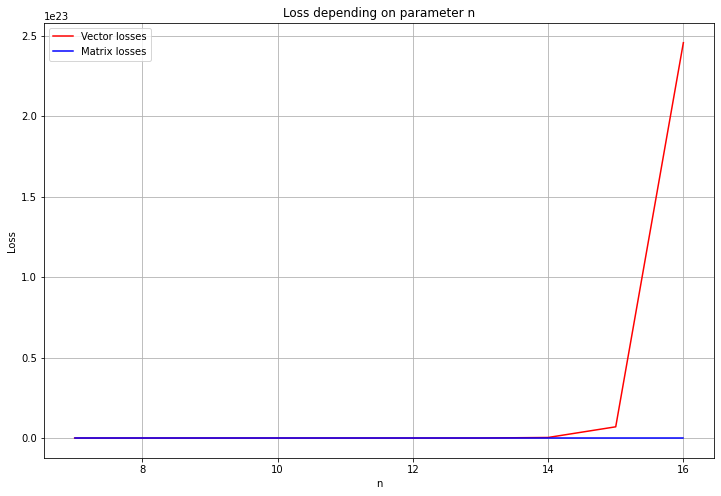

In [10]:
plt.plot(n_plot, losses_vector, label = "Vector losses", color='r')
plt.plot(n_plot, losses_matrix, label = "Matrix losses", color='b')

plt.xlabel('n')
plt.ylabel('Loss')
plt.title('Loss depending on parameter n')
  
plt.rcParams['figure.figsize'] = [12, 8]
    
plt.legend()
plt.grid()
plt.show()

**Conclusion**: For the given case we see that losses
$$
\mathcal{L}_v(\boldsymbol{x} \mid \hat{\boldsymbol{x}}) = \|\boldsymbol{x} - \hat{\boldsymbol{x}}\| \\
$$

$$
\mathcal{L}_M(\boldsymbol{x} \mid \mathbf{M}, \boldsymbol{b}) = \|\mathbf{M}\boldsymbol{x} - \boldsymbol{b}\|
$$

give completely different results for $n>15$. Thus, $\mathcal{L}_M$ cannot be considered as a valid metric for accuracy evaluation 